In [199]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [200]:
#importing dataset
titanic_dt = pd.read_csv('train.csv')

In [201]:
titanic_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [202]:
#missing data check
titanic_dt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

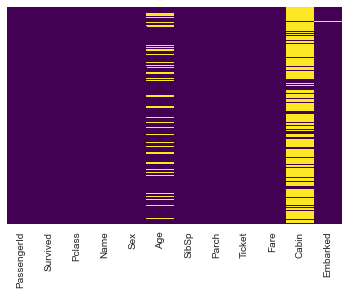

In [203]:
#null values watching in a heatmap 
sns.heatmap(titanic_dt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

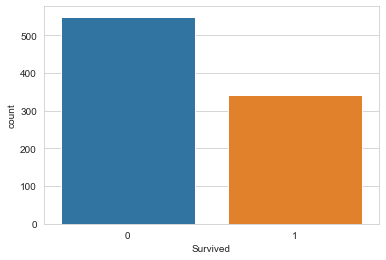

In [204]:
# checking if the dataset is balanced with how many people survived and how many did not
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_dt)

<AxesSubplot:xlabel='Survived', ylabel='count'>

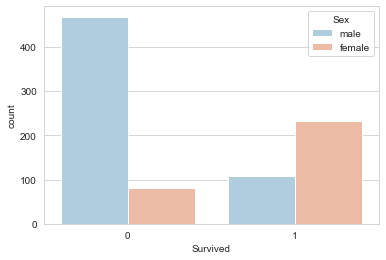

In [205]:
# checking survival rate of male and female
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic_dt,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

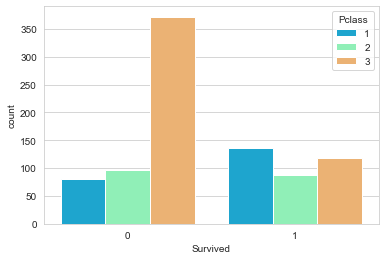

In [206]:
# checking survival rate of passenger classes
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic_dt,palette='rainbow')

<AxesSubplot:>

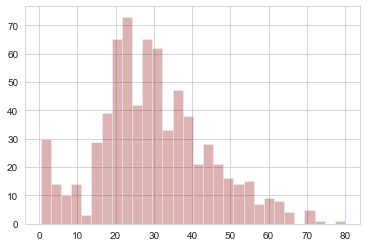

In [207]:
# checking age of passenger in historgram
titanic_dt['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

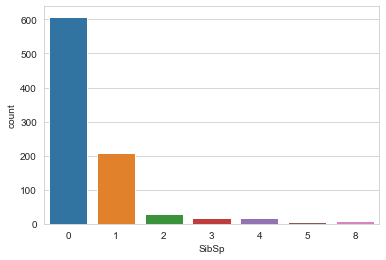

In [208]:
# checking the graph of sibling and spouses
sns.countplot(x='SibSp',data=titanic_dt)

<AxesSubplot:>

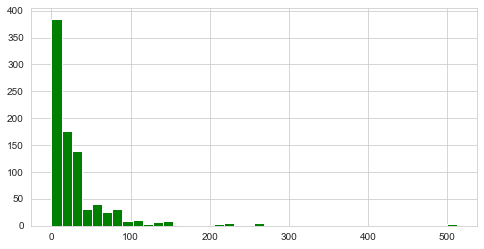

In [209]:
# checking the graph of fare in historgram
titanic_dt['Fare'].hist(color='green',bins=40,figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

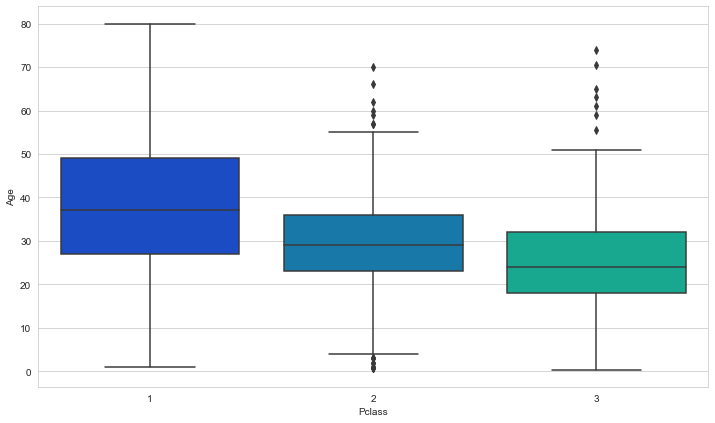

In [210]:
# Removing Null values from the dataset
#ploting a graph of passenger age and class where middle line is the average passenger age
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_dt,palette='winter')

In [211]:
# defining age according to passenger class
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): #enter loop if age is null

        if Pclass == 1:
            return 35 #returning 35 becasuse for pclass 1 average age is 37

        elif Pclass == 2:
            return 28 #returning 28 becasuse for pclass 2 average age is 29

        else:
            return 23 #returning 23 becasuse for pclass 3 average age is 24

    else:
        return Age #returning the actual age as age is cannot be null

In [212]:
#now applying the fucntion into dataset to replace null values of age
titanic_dt['Age'] = titanic_dt[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

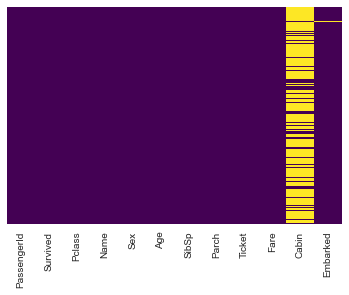

In [213]:
#now checking the heatmap again to compare
sns.heatmap(titanic_dt.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [214]:
#we will drop the cabin as there are too many missing entries
titanic_dt.drop('Cabin',axis=1,inplace=True)

In [215]:
#checking if cabin is dropped or not
titanic_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [216]:
#one hot encoding
pd.get_dummies(titanic_dt['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [217]:
#removing Sex and Embarked Feature
sex = pd.get_dummies(titanic_dt['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_dt['Embarked'],drop_first=True)

In [218]:
titanic_dt.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [219]:
#cheking if features removed or not
titanic_dt.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [220]:
titanic_dt = pd.concat([titanic_dt,sex,embark],axis=1)
titanic_dt.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [221]:
#droping survive column as it is my dependet feature
titanic_dt.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [222]:
#output data
titanic_dt['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [248]:
from sklearn.model_selection import train_test_split

#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics

# cross validation
from sklearn.model_selection import StratifiedKFold

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC 

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

In [249]:
#train test spliting
X_train, X_test, y_train, y_test = train_test_split(titanic_dt.drop('Survived',axis=1),titanic_dt['Survived'],test_size=0.30,random_state=5)


In [250]:
#Decision Tree Model

In [251]:
decc = DecisionTreeClassifier()
decc.fit(X_train,y_train)
y_pred_decc = decc.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Decision Tree,0.757463,0.683673,0.663366,0.814371,0.673367,0.738869,8.377035,0.480696


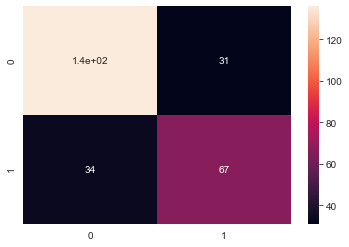

In [252]:
CM=confusion_matrix(y_test,y_pred_decc)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_decc)
acc= accuracy_score(y_test, y_pred_decc)
roc=roc_auc_score(y_test, y_pred_decc)
prec = precision_score(y_test, y_pred_decc)
rec = recall_score(y_test, y_pred_decc)
f1 = f1_score(y_test, y_pred_decc)

mathew = matthews_corrcoef(y_test, y_pred_decc)
model_results =pd.DataFrame([['Decision Tree',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [253]:
#Naive Bayes Model

In [254]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Naive Bayes,0.813433,0.774194,0.712871,0.874251,0.742268,0.793561,6.443864,0.597706


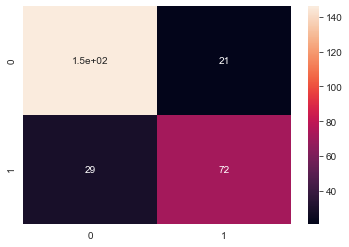

In [279]:
CM=confusion_matrix(y_test,y_pred_gb)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_gb)
acc= accuracy_score(y_test, y_pred_gb)
roc=roc_auc_score(y_test, y_pred_gb)
prec = precision_score(y_test, y_pred_gb)
rec = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

mathew = matthews_corrcoef(y_test, y_pred_gb)
model_results =pd.DataFrame([['Naive Bayes',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [256]:
#SVM Model

In [280]:
svc = SVC(kernel='linear',gamma='auto',probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Support Vector Classifier Linear,0.798507,0.783133,0.643564,0.892216,0.706522,0.76789,6.959359,0.56154


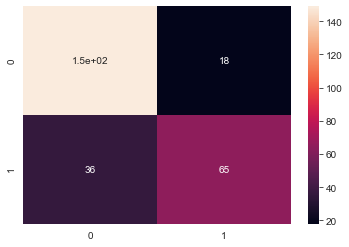

In [281]:
CM=confusion_matrix(y_test,y_pred_svc)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_svc)
acc= accuracy_score(y_test, y_pred_svc)
roc=roc_auc_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

mathew = matthews_corrcoef(y_test, y_pred_svc)
model_results =pd.DataFrame([['Support Vector Classifier Linear',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [282]:
#Logistic Regression Model

In [283]:
lg_reg = LogisticRegression(penalty='l2')
lg_reg.fit(X_train,y_train)
y_pred_lgreg = lg_reg.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Logistic Regression,0.813433,0.807229,0.663366,0.904192,0.728261,0.783779,6.443849,0.594846


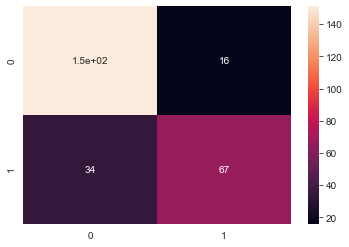

In [284]:
CM=confusion_matrix(y_test,y_pred_lgreg)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_lgreg)
acc= accuracy_score(y_test, y_pred_lgreg)
roc=roc_auc_score(y_test, y_pred_lgreg)
prec = precision_score(y_test, y_pred_lgreg)
rec = recall_score(y_test, y_pred_lgreg)
f1 = f1_score(y_test, y_pred_lgreg)

mathew = matthews_corrcoef(y_test, y_pred_lgreg)
model_results =pd.DataFrame([['Logistic Regression',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [285]:
#Random Forest Model

In [286]:
rf_ent = RandomForestClassifier(criterion='entropy',n_estimators=100)
rf_ent.fit(X_train, y_train)
y_pred_rfe = rf_ent.predict(X_test)

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.809701,0.797619,0.663366,0.898204,0.724324,0.780785,6.572728,0.594846


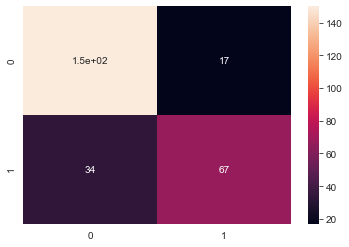

In [287]:
CM=confusion_matrix(y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(y_test, y_pred_rfe)
acc= accuracy_score(y_test, y_pred_rfe)
roc=roc_auc_score(y_test, y_pred_rfe)
prec = precision_score(y_test, y_pred_rfe)
rec = recall_score(y_test, y_pred_rfe)
f1 = f1_score(y_test, y_pred_rfe)

mathew = matthews_corrcoef(y_test, y_pred_lgreg)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

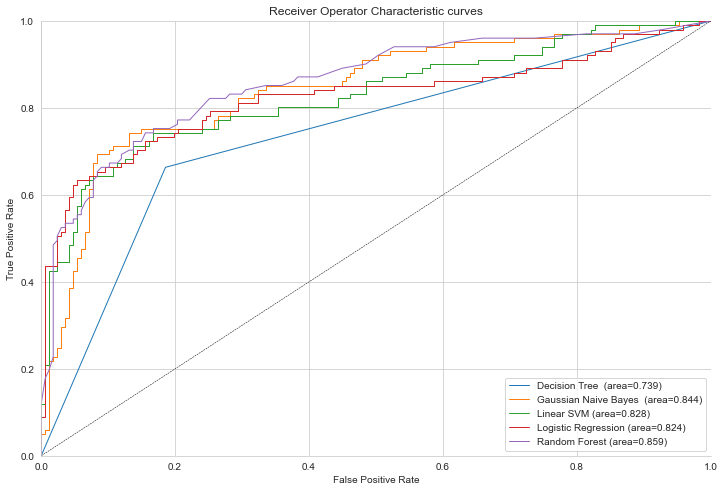

In [288]:
#ROC
def roc_auc_plot(y_true, y_proba, label=' ', l='-', lw=1.0):
    from sklearn.metrics import roc_curve, roc_auc_score
    fpr, tpr, _ = roc_curve(y_true, y_proba[:,1])
    ax.plot(fpr, tpr, linestyle=l, linewidth=lw,
            label="%s (area=%.3f)"%(label,roc_auc_score(y_true, y_proba[:,1])))

f, ax = plt.subplots(figsize=(12,8))


roc_auc_plot(y_test,decc.predict_proba(X_test),label='Decision Tree ',l='-')
roc_auc_plot(y_test,gb.predict_proba(X_test),label='Gaussian Naive Bayes ',l='-')
roc_auc_plot(y_test,svc.predict_proba(X_test),label='Linear SVM',l='-')
roc_auc_plot(y_test,lg_reg.predict_proba(X_test),label='Logistic Regression',l='-')
roc_auc_plot(y_test,rf_ent.predict_proba(X_test),label='Random Forest',l='-')

ax.plot([0,1], [0,1], color='k', linewidth=0.5, linestyle='--', 
        )    
ax.legend(loc="lower right")    
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_title('Receiver Operator Characteristic curves')
sns.despine()